In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import PIL
from PIL import Image
import matplotlib.image as mpimg
from tensorflow.keras.utils import plot_model
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_dir = "/content/gdrive/MyDrive/MY RESEARCH/SignLanguage/Data/train"
test_dir = "/content/gdrive/MyDrive/MY RESEARCH/SignLanguage/Data/test"

In [ ]:
# Define the image size, number of classes, and batch size
img_width, img_height = 256, 256
num_classes = 36
batch_size = 32

In [ ]:
# Data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation between -20 and 20 degrees
    width_shift_range=0.1,  # Randomly shift the image horizontally by a fraction of total width
    height_shift_range=0.1,  # Randomly shift the image vertically by a fraction of total height
    shear_range=0.2,  # Apply random shearing transformation
    zoom_range=0.2,  # Apply random zooming
    horizontal_flip=True  # Randomly flip the image horizontally
)

In [ ]:
# Validation data should not be augmented
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [ ]:
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    seed=123
)


Found 3543 images belonging to 36 classes.


In [ ]:
val_ds = val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    seed=123
)

Found 887 images belonging to 36 classes.


In [ ]:
class_names = list(train_ds.class_indices.keys())
print("Class Names:", class_names)


Class Names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '4', '5', '6', '7', '8', '9']


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Create a Sequential model
model = Sequential()

# Load pre-trained VGG19 model
pretrained_model = VGG19(include_top=False,
                         input_shape=(256, 256, 3),
                         pooling='avg',
                         weights='imagenet')

# Freeze the weights of pre-trained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained VGG19 model to the Sequential model
model.add(pretrained_model)

# Add a Flatten layer to convert the output to a 1D feature vector
model.add(Flatten())

# Add a fully connected Dense layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a fully connected Dense layer with 36 units for classification (assuming 36 classes)
model.add(Dense(36, activation='softmax'))

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 36)                18468     
                                                                 
Total params: 20,305,508
Trainable params: 281,124
Non-trainable params: 20,024,384
_________________________________________________________________


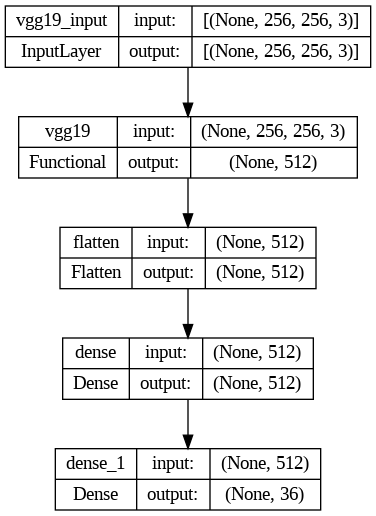

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
111/111 [==============================] - 2387s 21s/step - loss: 3.3637 - accuracy: 0.1414 - val_loss: 2.9578 - val_accuracy: 0.2390
Epoch 2/30
111/111 [==============================] - 242s 2s/step - loss: 2.6281 - accuracy: 0.3675 - val_loss: 2.1383 - val_accuracy: 0.5389
Epoch 3/30
111/111 [==============================] - 242s 2s/step - loss: 1.9414 - accuracy: 0.5687 - val_loss: 1.5607 - val_accuracy: 0.6246
Epoch 4/30
111/111 [==============================] - 247s 2s/step - loss: 1.4482 - accuracy: 0.6957 - val_loss: 1.1352 - val_accuracy: 0.7632
Epoch 5/30
111/111 [==============================] - 249s 2s/step - loss: 1.1414 - accuracy: 0.7468 - val_loss: 0.8634 - val_accuracy: 0.8038
Epoch 6/30
111/111 [==============================] - 242s 2s/step - loss: 0.9174 - accuracy: 0.7940 - val_loss: 0.7341 - val_accuracy: 0.8016
Epoch 7/30
111/111 [==============================] - 240s 2s/step - loss: 0.7802 - accuracy: 0.8132 - val_loss: 0.6163 - val_accuracy: 0.84

In [ ]:
# Save Model
import pickle

MODEL_NAME = '/content/gdrive/MyDrive/MY RESEARCH/SignLanguage/Data/model.h5'
model.save(MODEL_NAME)

history_filename = '/content/gdrive/MyDrive/MY RESEARCH/SignLanguage/Data/history.pickle'
with open(history_filename, 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
#Load Model

from tensorflow.keras.models import load_model
MODEL_NAME = '/content/gdrive/MyDrive/MY RESEARCH/SignLanguage/Data/model.h5'
model = load_model(MODEL_NAME)

history_filename = '/content/gdrive/MyDrive/MY RESEARCH/SignLanguage/Data/history.pickle'

with open(history_filename, 'rb') as file:
    history = pickle.load(file)

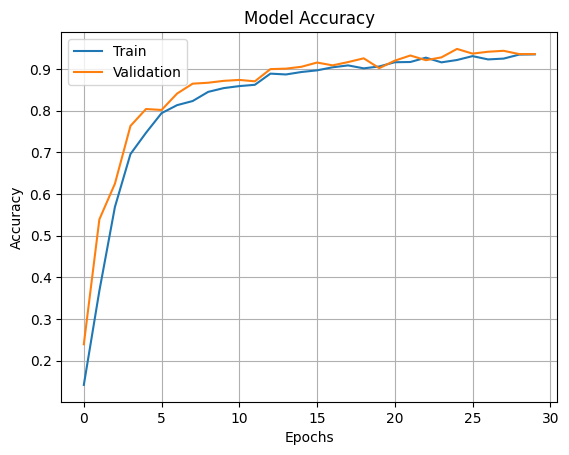

In [ ]:
# Plot the accuracy history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()

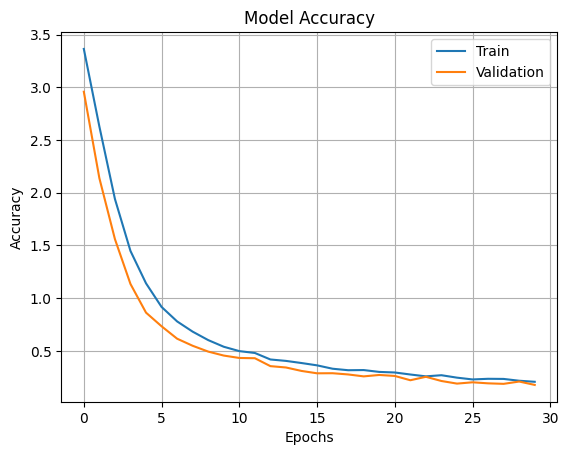

In [ ]:
# Plot the accuracy history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files

Saving IMG_20210531_192545.jpg to IMG_20210531_192545.jpg


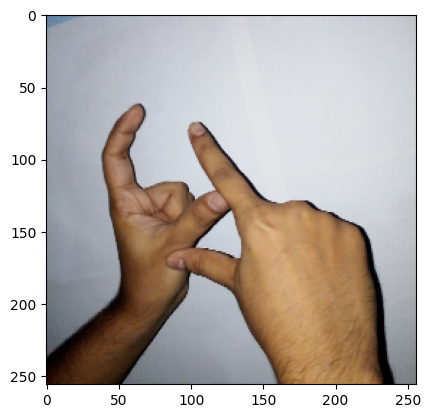

1/1 [==============================] - 0s 20ms/step
Model Prediction : 9
0 : 0.0 %
1 : 0.0 %
10 : 0.0 %
11 : 0.0 %
12 : 0.0 %
13 : 0.0 %
14 : 0.0 %
15 : 0.0 %
16 : 0.0 %
17 : 0.0 %
18 : 0.0 %
19 : 0.0 %
2 : 0.0 %
20 : 0.0 %
21 : 0.0 %
22 : 0.0 %
23 : 0.0 %
24 : 0.0 %
25 : 0.0 %
26 : 0.0 %
27 : 0.0 %
28 : 0.0 %
29 : 0.0 %
3 : 0.0 %
30 : 0.0 %
31 : 0.0 %
32 : 0.0 %
33 : 0.0 %
34 : 0.0 %
35 : 0.0 %
4 : 0.0 %
5 : 0.0 %
6 : 0.0 %
7 : 0.0 %
8 : 0.0 %
9 : 100.0 %


In [ ]:
from PIL import Image
import matplotlib.image as mpimg
from google.colab import files
import cv2


uploaded = files.upload()

file_name = next(iter(uploaded))

image = mpimg.imread('{}'.format(file_name))
image_resized= cv2.resize(image, (img_height,img_width))

imgplot = plt.imshow(image_resized)
plt.axis()
plt.show()

image = np.expand_dims(image_resized,axis=0)
result = model.predict(image)

# Print top prediction
print('Model Prediction : '+ class_names[np.argmax(result)])

# Print all classes
x=len(result[0])

for i in range(0,x):
  print(str(class_names[i])+' : '+str((result[0][i])*100)+' %')

28/28 [==============================] - 39s 1s/step


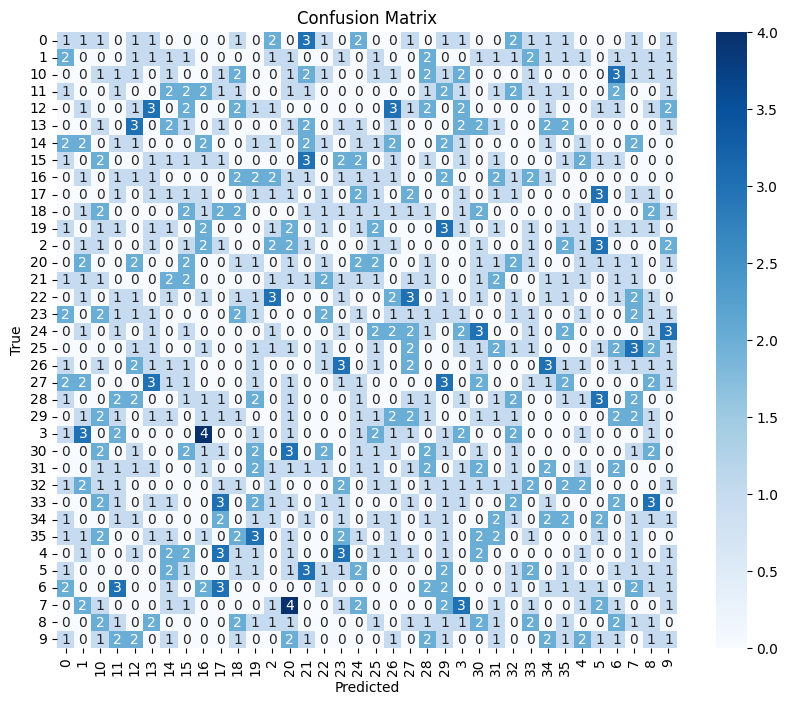

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels
y_true = val_ds.classes
y_pred = model.predict(val_ds)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()